# Practicum - 2 Diabetes Readmission Prediction

In [26]:
#Importing necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

In [2]:
#Load data into DataFrame

diabetes =  pd.read_csv("C:\\Users\\hp\\Desktop\\PersonalFolder\\ISB CBA\\Practicum2\\dataset_diabetes\\diabetic_data.csv")

### Descriptive Analysis of Dataset

In [3]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
diabetes.shape

#50 Features with 101766 records

(101766, 50)

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [6]:
diabetes.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


##### List of Continuous/Numerical Variables
time_in_hospital
num_lab_procedures
num_procedures
num_medications
number_outpatient
number_emergency
number_inpatient
number_diagnoses

Others are mostly categorical variables

# Preprocessing the Data

In [7]:
for col in diabetes.columns:
    if diabetes[col].dtype == object:
        if diabetes[col][diabetes[col] == "?"].count() > 0:
            print(col, diabetes[col][diabetes[col] == "?"].count(), diabetes[col][diabetes[col] == "?"].count() / len(diabetes) * 100)

#Following variables have data with entry "?"

race 2273 2.2335554114340743
weight 98569 96.85847925633315
payer_code 40256 39.5574160328597
medical_specialty 49949 49.08220820313268
diag_1 21 0.02063557573256294
diag_2 358 0.3517874339170253
diag_3 1423 1.398305917497003


In [8]:
#Per check the raw data visually, Gender have invalid entry as "Unknown/Invalid"

print('gender' , diabetes['gender'][diabetes['gender'] == "Unknown/Invalid"].count())

gender 3


##### Column 'weight' almost has 98% redundancy in data, it is hard to impute from other less data.
Hence we will remove this columns

In [9]:
diabetes = diabetes.drop('weight', axis = 1)

##### Now, 'payer_code' and 'medical_specialty' has above 40 - 50 % of redundancy in data.
Also, both are categorical data, hence very hard to impute. we will drop these 2 columns.

In [10]:
diabetes = diabetes.drop(['payer_code','medical_specialty'], axis = 1)

##### Gender has only 3 invalid records as 'Unknown/Invalid'.
Hence we will drop those records

In [11]:
diabetes = diabetes[diabetes['gender'] != 'Unknown/Invalid']

##### 'diag_1','diag_2','diag_3' are indicators of diagnosis 
If all three are missing, that’s bad data. So we only drop those records where all three diagnoses are missing.

In [12]:
diabetes = diabetes.drop(diabetes[(diabetes['diag_1'] == '?') & (diabetes['diag_2'] == '?') & (diabetes['diag_3'] == '?')].index)

##### discharge_disposition_id --> Expired 
From Ids Mapping file understood Discharge Dispostion with value 11 indicated patients are expired, hence remove those records

In [15]:
diabetes = diabetes[diabetes['discharge_disposition_id'] != 11]

##### Dropping Records in Column 'Race' with value '?'
Since only it has 2% of records with '?', hence we will drop those records

In [18]:
diabetes = diabetes[diabetes['race'] != '?']

##### 'examide' & 'citoglipton'  had same values on each row's
Seems like missing information probles, hence dropping these features

In [20]:
diabetes = diabetes.drop(['examide','citoglipton'], axis = 1)

In [21]:
diabetes.shape

(97883, 45)

#### Feature Creation
Service Utilization --> indicates services availed by patient relations

In [23]:
diabetes['service_utilization'] = diabetes['number_outpatient'] + diabetes['number_emergency'] + diabetes['number_inpatient']

Per analyzing dataset, exluding 'examide' and 'citoglipton' we have 23 drug combinations with Values as DOWN, NO, STEADY & UP
--> these indicates whether a change in medication was made or not during the treatment at the hospital.

In General, doctors change presciption based on patients progress with treatment and it highly indicates the relation with re-admission.

So, counting how many changes were made in total for each patient and declate as new feature 

In [28]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide',
        'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 
        'troglitazone', 'tolbutamide', 'acetohexamide']

for col in keys:
    colname = str(col) + 'temp'
    diabetes[colname] = diabetes[col].apply(lambda x: 0 if(x == 'No' or x == 'Steady') else 1 )

diabetes['numchange'] = 0

for col in keys:
    colname = str(col) + 'temp'
    diabetes['numchange'] = diabetes['numchange'] + diabetes[colname]
    del diabetes[colname]

Another factor could be no of medication used by the patient which indicates severity of the diabetes for the patient

In [31]:
#Converting Categorical values into numerical

for col in keys:
    diabetes[col] = diabetes[col].replace('No', 0)
    diabetes[col] = diabetes[col].replace('Steady', 1)
    diabetes[col] = diabetes[col].replace('Up', 1)
    diabetes[col] = diabetes[col].replace('Down', 1) 


In [32]:
diabetes['nummed'] = 0
for col in keys:
    diabetes['nummed'] = diabetes['nummed'] + diabetes[col]

In [34]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,service_utilization,numchange,nummed
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,0,0,0,0,No,No,NO,0,0,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,0,0,0,0,Ch,Yes,>30,0,1,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,0,0,0,0,No,Yes,NO,3,0,1
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,0,0,0,0,Ch,Yes,NO,0,1,1
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,0,0,0,0,Ch,Yes,NO,0,0,2


Categorization of Diagnoses

Dataset has totally 3 diagnoses ICD values till 999 & sting data.
Compressing these into 9 categoris as Circulatory, Respiratory, Digestive, Diabetes, Injury, Musculoskeletal, Genitourinary, Neoplasms, and Others


In [54]:
# create a duplicate of the diagnosis column
diabetes['level1_diag1'] = diabetes['diag_1']
# disease codes starting with V or E are in “other” category; so recode them to 0
diabetes.loc[diabetes['diag_1'].str.contains('V'), ['level1_diag1']] = 0
diabetes.loc[diabetes['diag_1'].str.contains('E'), ['level1_diag1']] = 0
# also replace the unknown values with -1
diabetes['level1_diag1'] = diabetes['level1_diag1'].replace('?', -1)
diabetes['level1_diag1'] = diabetes['level1_diag1'].astype(float)
diabetes['level1_diag1'] = diabetes['level1_diag1'].astype(int)

In [56]:
for index, row in diabetes.iterrows():
    if (row['level1_diag1'] >= 390 and row['level1_diag1'] < 460) or (np.floor(row['level1_diag1']) == 785):
        diabetes.loc[index, 'level1_diag1'] = 1
    elif (row['level1_diag1'] >= 460 and row['level1_diag1'] < 520) or (np.floor(row['level1_diag1']) == 786):
        diabetes.loc[index, 'level1_diag1'] = 2
    elif (row['level1_diag1'] >= 520 and row['level1_diag1'] < 580) or (np.floor(row['level1_diag1']) == 787):
        diabetes.loc[index, 'level1_diag1'] = 3
    elif (np.floor(row['level1_diag1']) == 250):
        diabetes.loc[index, 'level1_diag1'] = 4
    elif (row['level1_diag1'] >= 800 and row['level1_diag1'] < 1000):
        diabetes.loc[index, 'level1_diag1'] = 5
    elif (row['level1_diag1'] >= 710 and row['level1_diag1'] < 740):
        diabetes.loc[index, 'level1_diag1'] = 6
    elif (row['level1_diag1'] >= 580 and row['level1_diag1'] < 630) or (np.floor(row['level1_diag1']) == 788):
        diabetes.loc[index, 'level1_diag1'] = 7
    elif (row['level1_diag1'] >= 140 and row['level1_diag1'] < 240):
        diabetes.loc[index, 'level1_diag1'] = 8
    else:
        diabetes.loc[index, 'level1_diag1'] = 0

In [58]:
#Similarly for other 2 dianosis

diabetes['level1_diag2'] = diabetes['diag_2']
# disease codes starting with V or E are in “other” category; so recode them to 0
diabetes.loc[diabetes['diag_2'].str.contains('V'), ['level1_diag2']] = 0
diabetes.loc[diabetes['diag_2'].str.contains('E'), ['level1_diag2']] = 0
# also replace the unknown values with -1
diabetes['level1_diag2'] = diabetes['level1_diag2'].replace('?', -1)
diabetes['level1_diag2'] = diabetes['level1_diag2'].astype(float)
diabetes['level1_diag2'] = diabetes['level1_diag2'].astype(int)

In [59]:
for index, row in diabetes.iterrows():
    if (row['level1_diag2'] >= 390 and row['level1_diag2'] < 460) or (np.floor(row['level1_diag2']) == 785):
        diabetes.loc[index, 'level1_diag2'] = 1
    elif (row['level1_diag2'] >= 460 and row['level1_diag2'] < 520) or (np.floor(row['level1_diag2']) == 786):
        diabetes.loc[index, 'level1_diag2'] = 2
    elif (row['level1_diag2'] >= 520 and row['level1_diag2'] < 580) or (np.floor(row['level1_diag2']) == 787):
        diabetes.loc[index, 'level1_diag2'] = 3
    elif (np.floor(row['level1_diag2']) == 250):
        diabetes.loc[index, 'level1_diag2'] = 4
    elif (row['level1_diag2'] >= 800 and row['level1_diag2'] < 1000):
        diabetes.loc[index, 'level1_diag2'] = 5
    elif (row['level1_diag2'] >= 710 and row['level1_diag2'] < 740):
        diabetes.loc[index, 'level1_diag2'] = 6
    elif (row['level1_diag2'] >= 580 and row['level1_diag2'] < 630) or (np.floor(row['level1_diag2']) == 788):
        diabetes.loc[index, 'level1_diag2'] = 7
    elif (row['level1_diag2'] >= 140 and row['level1_diag2'] < 240):
        diabetes.loc[index, 'level1_diag2'] = 8
    else:
        diabetes.loc[index, 'level1_diag2'] = 0

In [60]:
diabetes['level1_diag3'] = diabetes['diag_3']
# disease codes starting with V or E are in “other” category; so recode them to 0
diabetes.loc[diabetes['diag_3'].str.contains('V'), ['level1_diag3']] = 0
diabetes.loc[diabetes['diag_3'].str.contains('E'), ['level1_diag3']] = 0
# also replace the unknown values with -1
diabetes['level1_diag3'] = diabetes['level1_diag3'].replace('?', -1)
diabetes['level1_diag3'] = diabetes['level1_diag3'].astype(float)
diabetes['level1_diag3'] = diabetes['level1_diag3'].astype(int)

In [61]:
for index, row in diabetes.iterrows():
    if (row['level1_diag3'] >= 390 and row['level1_diag3'] < 460) or (np.floor(row['level1_diag3']) == 785):
        diabetes.loc[index, 'level1_diag3'] = 1
    elif (row['level1_diag3'] >= 460 and row['level1_diag3'] < 520) or (np.floor(row['level1_diag3']) == 786):
        diabetes.loc[index, 'level1_diag3'] = 2
    elif (row['level1_diag3'] >= 520 and row['level1_diag3'] < 580) or (np.floor(row['level1_diag3']) == 787):
        diabetes.loc[index, 'level1_diag3'] = 3
    elif (np.floor(row['level1_diag3']) == 250):
        diabetes.loc[index, 'level1_diag3'] = 4
    elif (row['level1_diag3'] >= 800 and row['level1_diag3'] < 1000):
        diabetes.loc[index, 'level1_diag3'] = 5
    elif (row['level1_diag3'] >= 710 and row['level1_diag3'] < 740):
        diabetes.loc[index, 'level1_diag3'] = 6
    elif (row['level1_diag3'] >= 580 and row['level1_diag3'] < 630) or (np.floor(row['level1_diag3']) == 788):
        diabetes.loc[index, 'level1_diag3'] = 7
    elif (row['level1_diag3'] >= 140 and row['level1_diag3'] < 240):
        diabetes.loc[index, 'level1_diag3'] = 8
    else:
        diabetes.loc[index, 'level1_diag3'] = 0

Recoding other variables

In [63]:
diabetes['change'] = diabetes['change'].replace('Ch', 1)
diabetes['change'] = diabetes['change'].replace('No', 0)
diabetes['gender'] = diabetes['gender'].replace('Male', 1)
diabetes['gender'] = diabetes['gender'].replace('Female', 0)
diabetes['diabetesMed'] = diabetes['diabetesMed'].replace('Yes', 1)
diabetes['diabetesMed'] = diabetes['diabetesMed'].replace('No', 0)

Compressing other variables into limited categories

In [64]:
diabetes['admission_type_id'] = diabetes['admission_type_id'].replace(2,1)
diabetes['admission_type_id'] = diabetes['admission_type_id'].replace(7,1)
diabetes['admission_type_id'] = diabetes['admission_type_id'].replace(6,5)
diabetes['admission_type_id'] = diabetes['admission_type_id'].replace(8,5)

diabetes['A1Cresult'] = diabetes['A1Cresult'].replace('>7', 1)
diabetes['A1Cresult'] = diabetes['A1Cresult'].replace('>8', 1)
diabetes['A1Cresult'] = diabetes['A1Cresult'].replace('Norm', 0)
diabetes['A1Cresult'] = diabetes['A1Cresult'].replace('None', -99)

diabetes['max_glu_serum'] = diabetes['max_glu_serum'].replace('>200', 1)
diabetes['max_glu_serum'] = diabetes['max_glu_serum'].replace('>300', 1)
diabetes['max_glu_serum'] = diabetes['max_glu_serum'].replace('Norm', 0)
diabetes['max_glu_serum'] = diabetes['max_glu_serum'].replace('None', -99)

##### Recoding outcome variable

We will consider only those under age were re-admitted, hence these rows mapped with value 1
others as o

In [65]:
diabetes['readmitted'] = diabetes['readmitted'].replace('>30', 0)
diabetes['readmitted'] = diabetes['readmitted'].replace('<30', 1)
diabetes['readmitted'] = diabetes['readmitted'].replace('NO', 0)

Since the age is given in categories
let us map age as mid value for each category

In [68]:
age_dict = {'[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35, '[40-50)':45, '[50-60)':55, 
            '[60-70)':65, '[70-80)':75, '[80-90)':85, '[90-100)':95}
diabetes['age'] = diabetes.age.map(age_dict)
diabetes['age'] = diabetes['age'].astype('int64')

Check for duplicate records for same patient & remove it

In [69]:
diabetes = diabetes.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
diabetes.shape

(68618, 51)

In [71]:
diabetes.skew(axis=0)

encounter_id                  0.778956
patient_nbr                   0.513947
gender                        0.131271
age                          -0.638500
admission_type_id             1.321592
discharge_disposition_id      2.740219
admission_source_id           1.070339
time_in_hospital              1.173384
num_lab_procedures           -0.217830
num_procedures                1.229515
num_medications               1.429867
number_outpatient             9.616616
number_emergency             21.063302
number_inpatient              5.534537
number_diagnoses             -0.753814
max_glu_serum                 4.192050
A1Cresult                     1.645233
metformin                     1.410682
repaglinide                   8.490645
nateglinide                  11.731319
chlorpropamide               31.261812
glimepiride                   4.021140
acetohexamide               261.950377
glipizide                     2.219027
glyburide                     2.483694
tolbutamide              

In [72]:
diabetes.to_csv('C:\\Users\\hp\\Desktop\\PersonalFolder\\ISB CBA\\Practicum2\\diabetes_data_preprocessed.csv')

#### Loading Preprocessed Data

In [2]:
diabetes_new = pd.read_csv("C:\\Users\\hp\\Desktop\\PersonalFolder\\ISB CBA\\Practicum2\\diabetes_data_preprocessed.csv")

##### Check for Skewness,Kurtosis & Standardize only for integer data

In [3]:
#Change datatype as object for nominal data, befor standardization

i = ['encounter_id', 'patient_nbr', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
          'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', \
          'age', 'A1Cresult', 'max_glu_serum', 'level1_diag1', 'level1_diag2', 'level1_diag3']

diabetes_new[i] = diabetes_new[i].astype('object')

In [4]:
diabetes_new.dtypes

Unnamed: 0                   int64
encounter_id                object
patient_nbr                 object
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide           

In [5]:
num_col = list(set(list(diabetes_new._get_numeric_data().columns))- {'readmitted'})
num_col

['number_outpatient',
 'number_inpatient',
 'Unnamed: 0',
 'nummed',
 'number_emergency',
 'num_procedures',
 'num_medications',
 'num_lab_procedures',
 'service_utilization',
 'numchange',
 'number_diagnoses',
 'time_in_hospital']

In [6]:
statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
statdataframe

,numeric_column
0,number_outpatient
1,number_inpatient
2,Unnamed: 0
3,nummed
4,number_emergency
5,num_procedures
6,num_medications
7,num_lab_procedures
8,service_utilization
9,numchange


In [7]:
# Removing skewnewss and kurtosis using log transformation if it is above a threshold value (2)

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = diabetes_new[i].skew()
    skew_before.append(skewval)
    
    kurtval = diabetes_new[i].kurtosis()
    kurt_before.append(kurtval)
    
    sdval = diabetes_new[i].std()
    standard_deviation_before.append(sdval)
    
    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')
        
        if len(diabetes_new[diabetes_new[i] == 0])/len(diabetes_new) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(diabetes_new[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)
            
            kurtvalnew = np.log(pd.DataFrame(diabetes_new[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log(pd.DataFrame(diabetes_new[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(diabetes_new[diabetes_new[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)
        
            kurtvalnew = np.log1p(pd.DataFrame(diabetes_new[diabetes_new[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log1p(pd.DataFrame(diabetes_new[diabetes_new[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
    else:
        log_type.append('NA')
        log_transform_needed.append('No')
        
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,number_outpatient,9.616616,181.665019,1.074109,Yes,log1p,3.130559,10.485708,0.382224
1,number_inpatient,5.534537,46.455869,0.608152,Yes,log1p,3.097250,9.944466,0.298881
2,Unnamed: 0,0.099723,-1.144064,29128.387056,No,NA,0.099723,-1.144064,29128.387056
3,nummed,0.668258,0.197284,0.942351,No,NA,0.668258,0.197284,0.942351
4,number_emergency,21.063302,1189.447767,0.516460,Yes,log1p,4.223098,21.050782,0.231108
5,num_procedures,1.229515,0.573084,1.752476,No,NA,1.229515,0.573084,1.752476
6,num_medications,1.429867,3.849421,8.271615,No,NA,1.429867,3.849421,8.271615
7,num_lab_procedures,-0.217830,-0.302022,19.928086,No,NA,-0.217830,-0.302022,19.928086
8,service_utilization,6.649816,96.831480,1.441256,Yes,log1p,1.889580,3.184141,0.506973
9,numchange,1.603614,2.078269,0.476460,No,NA,1.603614,2.078269,0.476460


In [8]:
# performing the log transformation for the columns determined to be needing it above.

for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])
        
        if statdataframe['log_type'][i] == 'log':
            diabetes_new = diabetes_new[diabetes_new[colname] > 0]
            diabetes_new[colname + "_log"] = np.log(diabetes_new[colname])
            
        elif statdataframe['log_type'][i] == 'log1p':
            diabetes_new = diabetes_new[diabetes_new[colname] >= 0]
            diabetes_new[colname + "_log1p"] = np.log1p(diabetes_new[colname])

In [9]:
diabetes_new = diabetes_new.drop(['number_outpatient', 'number_inpatient', 'number_emergency','service_utilization'], axis = 1)

In [10]:
diabetes_new.shape

(68618, 52)

In [11]:
# get list of only numeric features
numerics = list(set(list(diabetes_new._get_numeric_data().columns))- {'readmitted'})
numerics

['nummed',
 'Unnamed: 0',
 'service_utilization_log1p',
 'number_outpatient_log1p',
 'num_procedures',
 'number_emergency_log1p',
 'num_medications',
 'num_lab_procedures',
 'number_inpatient_log1p',
 'numchange',
 'number_diagnoses',
 'time_in_hospital']

In [12]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))
# numerics is a list of all numeric features
diabetes_new[numerics] = standardize(diabetes_new[numerics])

In [13]:
#Removing Outliers
import scipy as sp
diabetes_new = diabetes_new[(np.abs(sp.stats.zscore(diabetes_new[numerics])) < 3).all(axis=1)]

In [14]:
# show list of features that are categorical
diabetes_new.encounter_id = diabetes_new.encounter_id.astype('int64')
diabetes_new.patient_nbr = diabetes_new.patient_nbr.astype('int64')
diabetes_new.diabetesMed = diabetes_new.diabetesMed.astype('int64')
diabetes_new.change = diabetes_new.change.astype('int64')

# convert data type of nominal features in dataframe to 'object' type for aggregating
i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','A1Cresult']
diabetes_new[i] = diabetes_new[i].astype('int64')

diabetes_new.dtypes

Unnamed: 0                   float64
encounter_id                   int64
patient_nbr                    int64
race                          object
gender                        object
age                           object
admission_type_id             object
discharge_disposition_id      object
admission_source_id           object
time_in_hospital             float64
num_lab_procedures           float64
num_procedures               float64
num_medications              float64
diag_1                        object
diag_2                        object
diag_3                        object
number_diagnoses             float64
max_glu_serum                 object
A1Cresult                      int64
metformin                      int64
repaglinide                    int64
nateglinide                    int64
chlorpropamide                 int64
glimepiride                    int64
acetohexamide                  int64
glipizide                      int64
glyburide                      int64
t

In [15]:
diabetes_new.head().T

,1,2,3,4,5
Unnamed: 0,-1.66117,-1.66113,-1.6611,-1.66106,-1.66103
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,0,0,1,1,1
age,15,25,35,45,55
admission_type_id,1,1,1,1,1
discharge_disposition_id,1,1,1,1,1
admission_source_id,7,7,7,7,2
time_in_hospital,-0.436899,-0.777014,-0.777014,-1.11713,-0.436899


In [16]:
diabetes_new = diabetes_new.drop(['Unnamed: 0','encounter_id','patient_nbr','diag_1','diag_2','diag_3','race'], axis = 1)

#dropping other fields

# Model Building

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

##### Split Data into Train Test

In [18]:
diabetes_input = diabetes_new.drop(['readmitted'], axis = 1)
diabetes_output = diabetes_new['readmitted']

X_train, X_dev, Y_train, Y_dev = train_test_split(diabetes_input, diabetes_output, test_size=0.20, random_state=0)

## Logistic Regression Model

In [20]:
logreg = LogisticRegression(fit_intercept= True, penalty='l1')
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(logreg, X_train, Y_train, cv=10))))
logreg.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(logreg.score(X_dev, Y_dev)))

Cross Validation Score: 91.65%
Dev Set score: 91.22%


In [25]:
Y_predict = logreg.predict(X_dev)
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_predict, name = 'Predict'), margins = True)

Predict,0,All
Actual,,
0,1959,1959
1,209,209
All,2168,2168


In [31]:
from sklearn.metrics import  accuracy_score, confusion_matrix
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_predict)))
confusion_matrix(Y_dev, Y_predict)

Accuracy is 0.91


array([[11038,     0],
       [ 1063,     0]], dtype=int64)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y_dev, Y_predict))

             precision    recall  f1-score   support

          0       0.91      1.00      0.95     11038
          1       0.00      0.00      0.00      1063

avg / total       0.83      0.91      0.87     12101



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Since Dataset is highly imbalanced, current model is good only in predicting Non-Readmission cases.
But it is performing poorly for TRUE cases. Hence we need to balance the dataset using
SMOTE - Synthetic Minority Over-Sampling Technique

In [19]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(diabetes_output)))
sm = SMOTE(random_state=20)
diabetes_input_new, diabetes_output_new = sm.fit_sample(diabetes_input, diabetes_output)
print('New dataset shape {}'.format(Counter(diabetes_output_new)))
diabetes_input_new = pd.DataFrame(diabetes_input_new, columns = list(diabetes_input.columns))
X_train, X_dev, Y_train, Y_dev = train_test_split(diabetes_input_new, diabetes_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 55397, 1: 5106})
New dataset shape Counter({0: 55397, 1: 55397})


In [38]:
logreg = LogisticRegression(fit_intercept= True, penalty='l1')
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(logreg, X_train, Y_train, cv=10))))
logreg.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(logreg.score(X_dev, Y_dev)))

Cross Validation Score: 57.66%
Dev Set score: 57.75%


In [39]:
#Confusion Matrix
Y_predict = logreg.predict(X_dev)
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,6472,4586,11058
1,4776,6325,11101
All,11248,10911,22159


In [40]:
from sklearn.metrics import  accuracy_score, confusion_matrix
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_predict)))
confusion_matrix(Y_dev, Y_predict)

Accuracy is 0.58


array([[6472, 4586],
       [4776, 6325]], dtype=int64)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(Y_dev, Y_predict))

#Now We got 0.58 Accuracy using Logistic Regression after applying SMOTE

             precision    recall  f1-score   support

          0       0.58      0.59      0.58     11058
          1       0.58      0.57      0.57     11101

avg / total       0.58      0.58      0.58     22159



## Model 2 - Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
dectree =  DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(dectree, X_train, Y_train, cv=10))))
dectree.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(dectree.score(X_dev, Y_dev)))

Cross Validation score: 91.11%
Dev Set score: 91.41%


In [21]:
Y_predict = dectree.predict(X_dev)
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,10193,865,11058
1,1038,10063,11101
All,11231,10928,22159


In [22]:
#Confusion Matrix
from sklearn.metrics import  accuracy_score, confusion_matrix
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_predict)))
confusion_matrix(Y_dev, Y_predict)

Accuracy is 0.91


array([[10193,   865],
       [ 1038, 10063]], dtype=int64)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(Y_dev, Y_predict))

#Now We got 0.92 Accuracy using Decision Tree after applying SMOTE

             precision    recall  f1-score   support

          0       0.91      0.92      0.91     11058
          1       0.92      0.91      0.91     11101

avg / total       0.91      0.91      0.91     22159



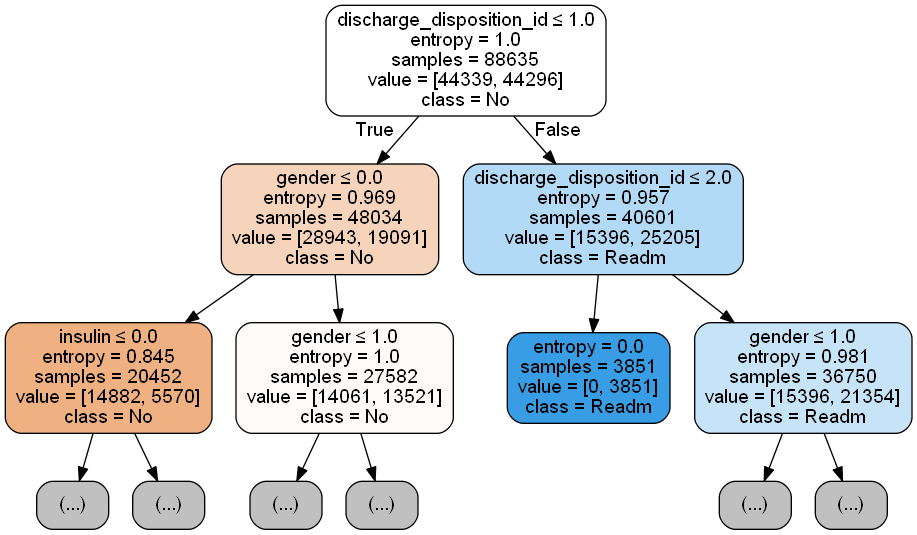

In [24]:
#Visualization of Decsion Tree
import graphviz
from IPython.display import Image
import pydotplus
from sklearn import tree
dot_dt_q2 = tree.export_graphviz(dectree, out_file="dt_q2.dot", feature_names=X_train.columns, max_depth=2,
                                 class_names=["No","Readm"], filled=True, rounded=True, special_characters=True)
graph_dt_q2 = pydotplus.graph_from_dot_file('dt_q2.dot')
Image(graph_dt_q2.create_png())

                     Feature  Importance
8            num_medications    0.029940
12                 metformin    0.035707
39              level1_diag3    0.036843
6         num_lab_procedures    0.038720
9           number_diagnoses    0.045405
5           time_in_hospital    0.057671
27                   insulin    0.087337
3   discharge_disposition_id    0.098213
7             num_procedures    0.129325
0                     gender    0.241362


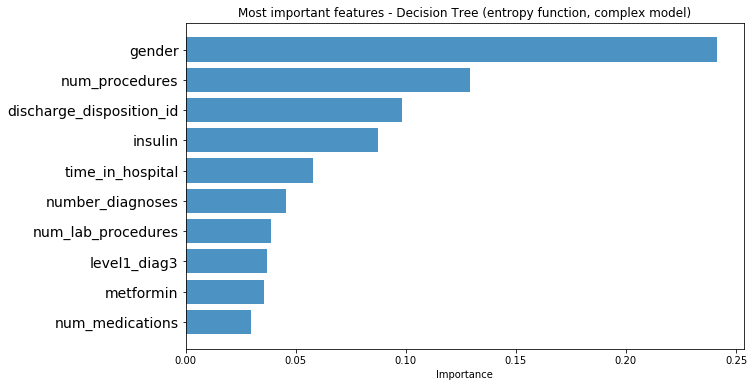

In [27]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = dectree.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree (entropy function, complex model)')
plt.show()